<a href="https://colab.research.google.com/github/Lamchiphi/DataAnalystDeepLearning/blob/main/Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# hàm này để hiển thị các tấm ảnh 
import matplotlib.pyplot as plt
# để chọn ngẫu nhiên các tấm ảnh
import random
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
# các hàm sau để xây dựng mô hình mạng neural 
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation


Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print("x_train shape",x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)


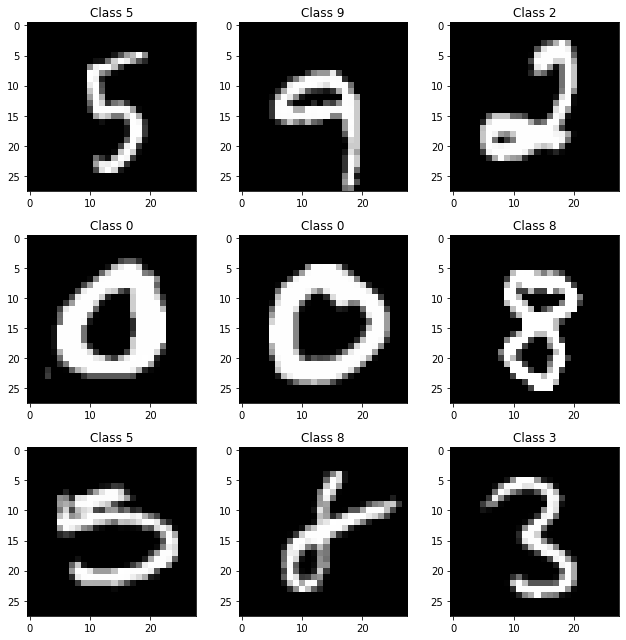

In [3]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()


Formatting the input data layer
Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.


Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

In [4]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')

x_train/=255


print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)


Diễn giải:

model= Sequential(): Khai báo mô hình
model.add(...): Thêm một thành phần vào trong mô hình
Dense(number, input_shape(,)): kết nối tất cả các phần tử layer hiện tại với toàn bộ các phần tử của layer trước đó. Giá trị đầu tiên trong Dense bằng number thể hiện việc có number phần tử ở layer này. input_shape = (,) chính là kích thước của dữ liệu đầu vào. Kích thước này là một tuple nên ta cần viết dưới dạng tuple, thí dụ (784,)
Activation ('relu/softmax/linear'):


The first hidden layer

In [7]:
model= Sequential()
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))


Adding the second hidden layer

In [8]:
model.add(Dense(40))
model.add(Activation('relu'))


The Final Output Layer

In [9]:
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
activation_1 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                410       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 8,700
Trainable params: 8,700
Non-trainable params: 0
______________________________________________________


Hàm loss function

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=5)

predicted_classes=model.predict(x_test)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.6733 - accuracy: 0.8068
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.9122
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2643 - accuracy: 0.9220
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2420 - accuracy: 0.9300
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2265 - accuracy: 0.9345


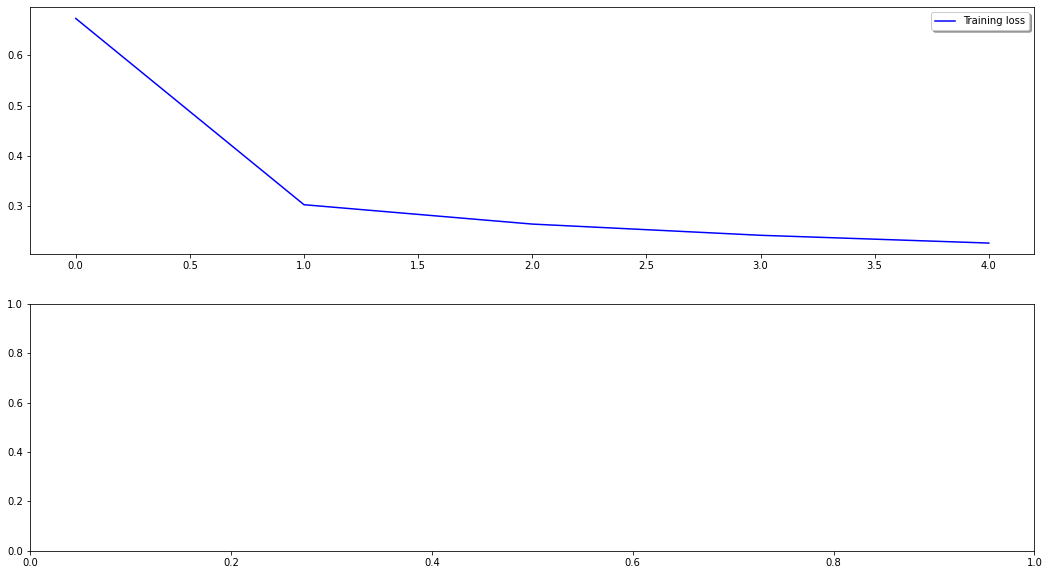

In [11]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

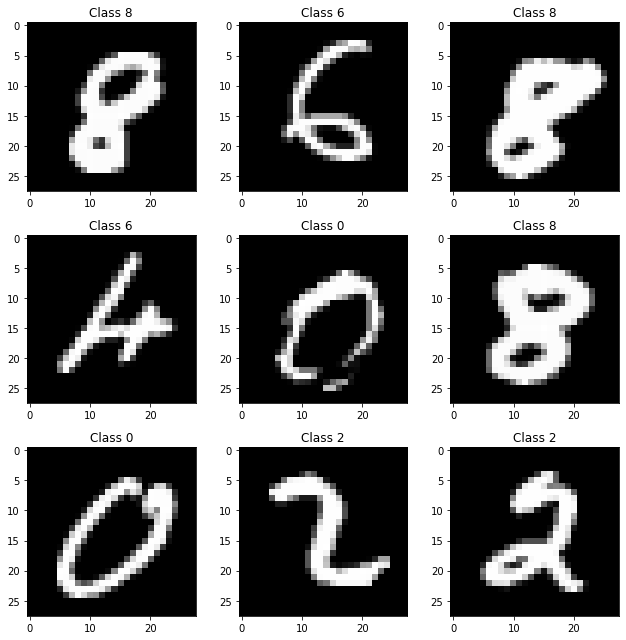

In [12]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()  

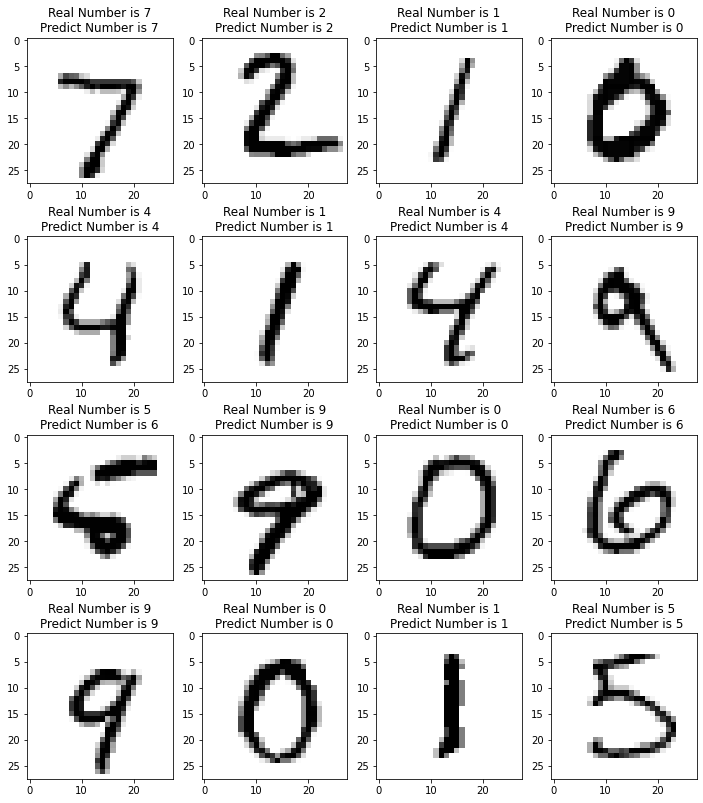

In [14]:
y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");